1. Implementar una función en Python que calcule la media geométrica de un arreglo
de N elementos..


In [4]:
import math

def calcular_media_geometrica(arr):
    if len(arr) == 0:
        return None

    producto = 1

    for num in arr:
        producto *= num

    return math.pow(producto, 1/len(arr))

2. Implementar una función en C que calcule la media geométrica de un arreglo de N
elementos

In [5]:
%%file lib_media_geometrica.c
#include <math.h>

double calcular_media_geometrica(float arr[], int length) {
    if (length == 0) {
        return 0;
    }

    double producto = 1;

    for (int i = 0; i < length; i++) {
        producto *= arr[i];
    }

    return pow(producto, 1.0 / length);
}


Overwriting lib_media_geometrica.c


In [6]:
!gcc -c lib_media_geometrica.c

In [7]:
!gcc -shared lib_media_geometrica.o -o lib_media_geometrica.so

3. Validar sus funciones con un arreglo de 8 elementos. Comparar su resultado con la
función pow de Python. Recordar que debe hacer uso de la librería ctypes para
llamar a su función en C.


In [9]:
import ctypes

# Cargar la biblioteca C
lib = ctypes.CDLL('./lib_media_geometrica.so')  # Reemplaza con el nombre y ruta correctos del archivo de la biblioteca

# Definir el tipo de argumentos y retorno para la función C
lib.calcular_media_geometrica.argtypes = (ctypes.POINTER(ctypes.c_float), ctypes.c_int)
lib.calcular_media_geometrica.restype = ctypes.c_double

# Arreglo de 8 elementos
arr = [2, 3, 4, 5, 6, 7, 8, 10]

# Python
media_python = calcular_media_geometrica(arr)

# C
arr_c = (ctypes.c_float * len(arr))(*arr)
media_c = lib.calcular_media_geometrica(arr_c, len(arr))

# Resultado usando la función pow de Python
media_pow = math.pow(math.prod(arr), 1/len(arr))

# Imprimir resultados
print("Media geométrica (Python):", media_python)
print("Media geométrica (C):", media_c)
print("Media geométrica (pow):", media_pow)

Media geométrica (Python): 5.01984220261428
Media geométrica (C): 5.01984220261428
Media geométrica (pow): 5.01984220261428


3. Realizar un análisis temporal de 50 iteraciones probando sus funciones para un
arreglo de N = 1024 elementos.


In [13]:
import time
import ctypes 
import matplotlib.pyplot as plt

# cargar biblioteca compartida (.so) generada en C
lib = ctypes.CDLL("./lib_media_geometrica.so")

# Definir el tipo de argumentos y retorno para la función C
lib.calcular_media_geometrica.argtypes = (ctypes.POINTER(ctypes.c_float), ctypes.c_int)
lib.calcular_media_geometrica.restype = ctypes.c_double

# Tamaño de arreglos
N_values = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

# Resultados de tiempos
tiempos_python = []
tiempos_c = []

# Ejecutar analisis temporal
N =1024
iterations= 50

arr = [1.23]*N

c_start_time = time.time()
for i in range(iterations):
    lib.calcular_media_geometrica((ctypes.c_float * N)(*arr), N )

c_end_time = time.time()
c_average_time = (c_end_time - c_start_time) / iterations

print(f"Tiempo de ejecución promedio en C para {iterations} iteraciones y N = {N}: {c_average_time} segundos")

py_start_time = time.time()
for i in range(iterations):
    result = calcular_media_geometrica(arr)
py_end_time = time.time()
py_average_time = (py_end_time - py_start_time) / iterations

print(f"Tiempo de ejecución promedio en Python para {iterations} iteraciones y N = {N}: {py_average_time} segundos")



Tiempo de ejecución promedio en C para 50 iteraciones y N = 1024: 0.0012446784973144532 segundos
Tiempo de ejecución promedio en Python para 50 iteraciones y N = 1024: 0.00036277294158935545 segundos


In [14]:
import time
import ctypes
import matplotlib.pyplot as plt

N_values = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


# cargar biblioteca compartida (.so) generada en C
lib = ctypes.CDLL("./lib_media_geometrica.so")

# Definir el tipo de argumentos y retorno para la función C
lib.calcular_media_geometrica.argtypes = (ctypes.POINTER(ctypes.c_float), ctypes.c_int)
lib.calcular_media_geometrica.restype = ctypes.c_double

# Tamaño de arreglos
N_values = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
iterations = 50

# Resultados de tiempos
tiempos_python = []
tiempos_c = []

# Ejecutar analisis temporal

# arreglo de números de punto flotante
for N in N_values:
    # Crear un arreglo de floats
    arr = [1.23]*N

    # Medir el tiempo de ejecución para la implementación en C
    c_start_time = time.time()
    for _ in range(iterations):
        lib.calcular_media_geometrica((ctypes.c_float * N)(*arr), N )
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time) / iterations
    tiempos_c.append(c_average_time)

    # Medir el tiempo de ejecución para la implementación en Python
    py_start_time = time.time()
    for _ in range(iterations):
        result = calcular_media_geometrica(arr)
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) / iterations
    tiempos_python.append(py_average_time)

# Tiempo de ejecución de pow como referencia
arr_ref = [1.23] * max(N_values)
start_time = time.time()
math.pow(math.prod(arr_ref), 1/len(arr_ref))
end_time = time.time()
tiempo_ref = end_time - start_time

# Imprimir los resultados

for i, N in enumerate(N_values):
    print("N =", N)
    print("Tiempo Python:", tiempos_python[i])
    print("Tiempo C:", tiempos_c[i])
    print()


N = 16
Tiempo Python: 2.4318695068359373e-06
Tiempo C: 2.608299255371094e-05

N = 32
Tiempo Python: 3.9768218994140624e-06
Tiempo C: 1.7461776733398436e-05

N = 64
Tiempo Python: 4.92095947265625e-06
Tiempo C: 2.5019645690917968e-05

N = 128
Tiempo Python: 1.3985633850097655e-05
Tiempo C: 6.284236907958984e-05

N = 256
Tiempo Python: 2.0923614501953126e-05
Tiempo C: 0.00011244297027587891

N = 512
Tiempo Python: 6.468772888183594e-05
Tiempo C: 0.000340118408203125

N = 1024
Tiempo Python: 8.186817169189453e-05
Tiempo C: 0.0004903030395507813

N = 2048
Tiempo Python: 0.00014295101165771485
Tiempo C: 0.0008056354522705078

N = 4096
Tiempo Python: 0.0001601886749267578
Tiempo C: 0.0012200021743774415

N = 8192
Tiempo Python: 0.00033045291900634765
Tiempo C: 0.0018742752075195312



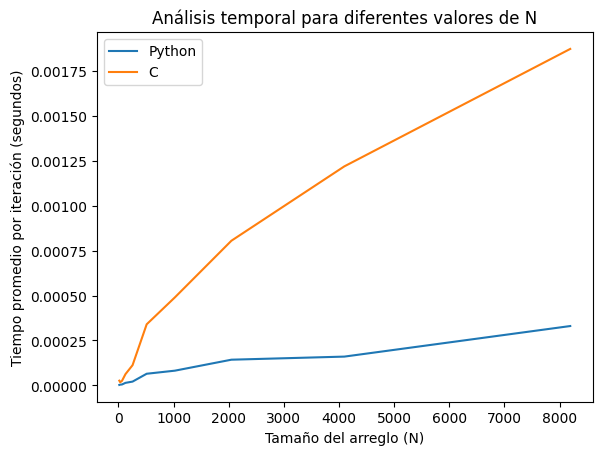

In [15]:
# Graficar los resultados
plt.plot(N_values, tiempos_python, label='Python')
plt.plot(N_values, tiempos_c , label='C')
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo promedio por iteración (segundos)')
plt.title('Análisis temporal para diferentes valores de N')
plt.legend()
plt.show()

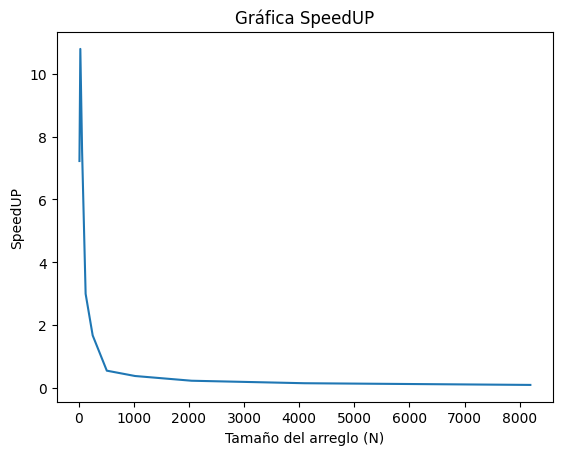

In [16]:
# Gráfica SpeedUP
speedup = [tiempo_ref / tiempos_c[i] for i in range(len(N_values))]

plt.plot(N_values, speedup)
plt.xlabel("Tamaño del arreglo (N)")
plt.ylabel("SpeedUP")
plt.title("Gráfica SpeedUP")
plt.show()